In [1]:
import dca_v2

In [2]:
dca_v2.run()

Nombre de campo/contrato/asignacion: LACAMANGO
Numero de campos de analisis: 
Analisis DCA Analogos (Y/''): 
Tomar muestra desde fecha (yyyy-mm-dd): 
Generar archivos (Y/''): Y
Generar Plots (Y/''): 


'Número de pozos en LACAMANGO: 50'

In [5]:
from dca_v2 import *

In [6]:
df=serie_campo.copy()

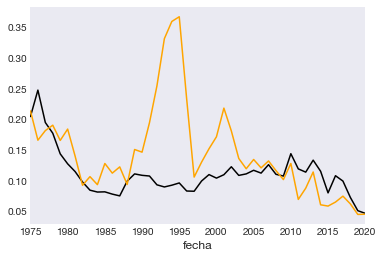

In [15]:
produccion=df.set_index('fecha').resample('Y').mean()
produccion.aceite_Mbd.plot(color='Black')
produccion.gas_asociado_MMpcd.plot(color='Orange')

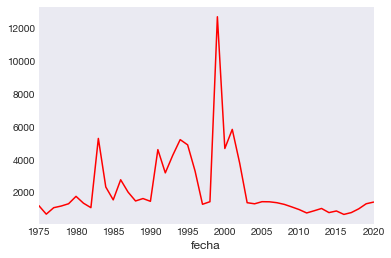

In [12]:
produccion.RGA.plot(color='r')

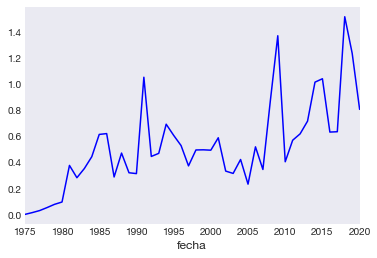

In [11]:
produccion.corte_agua.plot(color='b')

In [ ]:
df=df.groupby(by='pozo').mean()
intervenciones=df.ano_de_perforacion.value_counts()
intervenciones.index=pd.Index.astype(intervenciones.index,dtype='int64')
intervenciones=intervenciones.sort_index(ascending=True)
display(intervenciones)
intervenciones.plot(kind='bar')

In [ ]:
dfx=serie_campo.copy()
dfx['ano'] = dfx['first_oil'].dt.year

In [ ]:
sns.residplot('hiperbolica', 'residual_hiperbolica', data=df, lowess=True, color="g")
sns.residplot('exponencial', 'residual_exponencial', data=df, lowess=True, color="b")
sns.residplot('harmonica', 'residual_harmonica', data=df, lowess=True, color="r")

In [ ]:
df.plot(kind='scatter',x='hiperbolica',y='residual_hiperbolica',color='black')

df.plot(kind='scatter',x='exponencial',y='residual_exponencial',color='blue')

df.plot(kind='scatter',x='harmonica',y='residual_harmonica',color='brown')

In [ ]:
corr = df.corr()

fig,ax=plt.subplots(figsize=(30,20))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=10),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
display(corr)